# Práctica 5. Regresión logística.

la regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras.

En esta práctica trabajaremos con un dataset que contiene información sobre gente que fuma y no fuma y las distintas características que tienen al hacerlo o no.

In [1]:
# Importamos las librerías para visualizar los datos y hacer uso de la regresión logística
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Importamos el dataset que trabajaremos
visualizar = pd.read_csv('insurance.csv')
train = pd.read_csv('insurance.csv')
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Preprocesamos nuestros datos
train = pd.get_dummies(train, columns=['sex'],drop_first=True)
train.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [9]:
train = pd.get_dummies(train, columns=['smoker'],drop_first=True)
train.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


Primero comprobaremos si hay valores NaN en el dataset, esto lo visualizaremos gracias a un mapa de calor que nos mostrará si los hay o no.

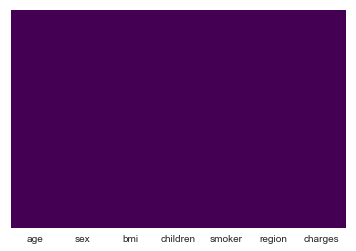

In [11]:
# Primero comprobamos si hay valores NaN en nuestro dataset
sns.heatmap(visualizar.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Notamos que no hay datos faltantes en nuestro dataset por lo que podemos continuar con nuestra visualización.

Ahora contaremos que personas son fumadoras y cuántas no lo son por sexo.

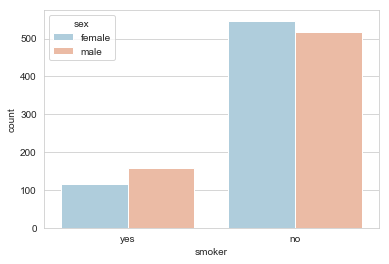

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='smoker', hue='sex', data=visualizar, palette='RdBu_r')

Notamos que la mayoría no fuma. Hay más hombres que fuman a compración de las mujeres. En cuanto a los que no fuman, hay más mujeres que hombres que no realizan la actividad.

Vemos que la tendencia a fumar es casi la misma en ambos sexos.

Ahora podemos ver a las personas que fuman dependiendo la región en donde habitan.

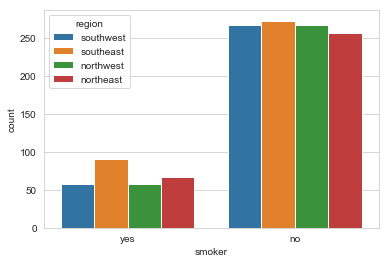

In [14]:
sns.countplot(x='smoker', hue='region', data=visualizar)

La tendencia a fumar es mayor en la region 'southeast' que en las demás pero también tiene más gente que no fuma (por muy poco).

Ahora veamos que edad tienen las personas fumadoras y las no fumadoras.

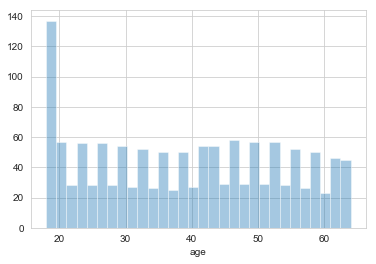

In [15]:
sns.distplot(train['age'], kde=False, bins=30)

La mayoría de los fumadores son jóvenes de entre 18 y 20 años de edad, teniendo alrededor de 200 mientras que las demás edades (mayores) no pasan de 60.

In [24]:
# Separamos nuestro dataset en la variable dependiente y las variables independientes
X = train.drop('region', axis=1)
y = train['region']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
prediction = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

   northeast       0.36      0.15      0.21       109
   northwest       0.47      0.06      0.11       109
   southeast       0.35      0.62      0.45       129
   southwest       0.24      0.40      0.30        95

   micro avg       0.32      0.32      0.32       442
   macro avg       0.36      0.31      0.27       442
weighted avg       0.36      0.32      0.28       442



Aquí informamos de la presición de fumadores para cada región.